![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Atividade Prática 5: 
Implementando um `Perceptron` para o dataset de `Lagartos`

<img src="Usp_logo.png" width= 200 height = 200 >

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Importando bibliotecas e lendo nossos dados

In [1]:
import numpy as np # principal biblioteca para manipulação de 'Tensor's  
import pandas as pd # manipulação dos dados
import math # biblioteca para operações matematicas

Lagartos_data = pd.read_excel('lagarto.xlsx')
Lagartos_data['espécime'] = 1 # transformando a coluna espécime em "Bias"
Lagartos_data = Lagartos_data.rename(columns={'espécime': 'Bias'})
Lagartos_data['Bias'] = Lagartos_data['Bias'].astype('float64') # convertendo o "Bias" de int para float
                                                                # apenas para podermos utilizar no treinamento

In [2]:
Lagartos_data # vendo nossos dados

Bias  massa em gramas  \
0    1.0            5.526   
1    1.0           10.401   
2    1.0            9.213   
3    1.0            8.953   
4    1.0            7.063   
5    1.0            6.610   
6    1.0           11.273   
7    1.0            2.447   
8    1.0           15.493   
9    1.0            9.004   
10   1.0            8.199   
11   1.0            6.601   
12   1.0            7.622   
13   1.0           10.067   
14   1.0           10.091   
15   1.0           10.888   
16   1.0            7.610   
17   1.0            7.733   
18   1.0           12.015   
19   1.0           10.049   
20   1.0            5.149   
21   1.0            9.158   
22   1.0           12.132   
23   1.0            6.978   
24   1.0            6.890   

    comprimento da passagem de ar do focinho em milímetros  \
0                                                59.0        
1                                                75.0        
2                                                69.0        
3                                                67.5        
4                                                62.0        
5                                                62.0        
6                                                74.0        
7                                                47.0        
8                                                86.5        
9                                                69.0        
10                                               70.5        
11                                               64.5        
12                                               67.5        
13                                               73.0        
14                                               73.0        
15                                               77.0        
16                                               61.5        
17                                               66.5        
18                                               79.5        
19                                               74.0        
20                                               59.5        
21                                               68.0        
22                                               75.0        
23                                               66.5        
24                                               63.0        

    dimensão da pata posterior em milímetros sexo  
0                                      113.5    F  
1                                      142.0    M  
2                                      124.0    F  
3                                      125.0    F  
4                                      129.5    M  
5                                      123.0    F  
6                                      140.0    M  
7                                       97.0    F  
8                                      162.0    M  
9                                      126.5    F  
10                                     136.0    M  
11                                     116.0    F  
12                                     135.0    M  
13                                     136.5    M  
14                                     135.5    M  
15                                     139.0    F  
16                                     118.0    M  
17                                     133.5    M  
18                                     150.0    M  
19                                     137.0    M  
20                                     116.0    F  
21                                     123.0    F  
22                                     141.0    M  
23                                     117.0    F  
24                                     117.0    F

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Visualizando nossos dados em 3D
Visualizando o dataset como um todo

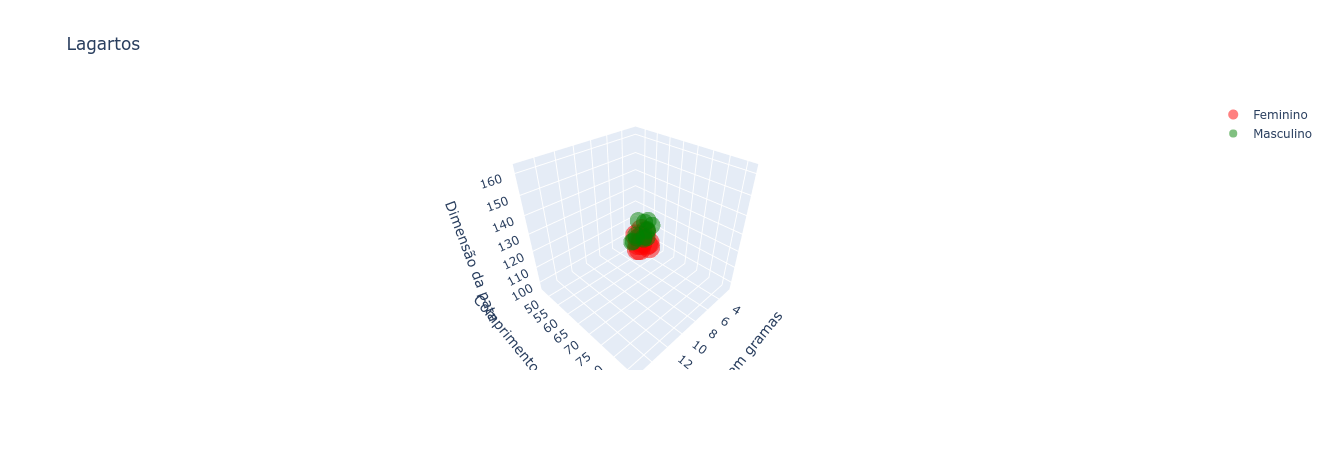

In [3]:
import plotly.graph_objects as go
import numpy as np

Femeas = Lagartos_data.loc[Lagartos_data.iloc[:,4] == 'F']
Machos = Lagartos_data.loc[Lagartos_data.iloc[:,4] == 'M']

# plot Femeas
x = Femeas.iloc[:,1]
y = Femeas.iloc[:,2]
z = Femeas.iloc[:,3]

fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x = x,
        y = y,
        z = z,
        mode='markers',
        marker=dict(
        size=10,
        color='red',
        opacity=0.5),
        name = "Feminino"))

# plot Machos
x = Machos.iloc[:,1]
y = Machos.iloc[:,2]
z = Machos.iloc[:,3]

fig.add_trace(
    go.Scatter3d(
        x = x,
        y = y,
        z = z,
        mode='markers',
        marker=dict(
        size=8,
        color='green',
        opacity=0.5),
        name = "Masculino",
        
    ))
fig.update_layout(scene = dict(
                    xaxis_title=Lagartos_data.columns[1],
                    yaxis_title='Comprimento do focinho',
                    zaxis_title='Dimensão da pata'),
                    width=700,
                    showlegend=True, title_text="Lagartos")

fig.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Normalizando nosso dados

In [4]:
Lagartos_normalizados = Lagartos_data.iloc[:19,1:-1] / Lagartos_data.iloc[:19,1:-1].max()

In [5]:
Lagartos_normalizados['sexo'] = Lagartos_data['sexo'] # vendo nossos dados de treino
Lagartos_normalizados.insert(loc = 0,column = "Bias" ,value = Lagartos_data['Bias']) # apenas atribuindo novamente a coluna "Bias" aos dados
Lagartos_normalizados

Bias  massa em gramas  \
0    1.0         0.356677   
1    1.0         0.671335   
2    1.0         0.594656   
3    1.0         0.577874   
4    1.0         0.455883   
5    1.0         0.426644   
6    1.0         0.727619   
7    1.0         0.157942   
8    1.0         1.000000   
9    1.0         0.581166   
10   1.0         0.529207   
11   1.0         0.426063   
12   1.0         0.491964   
13   1.0         0.649777   
14   1.0         0.651326   
15   1.0         0.702769   
16   1.0         0.491190   
17   1.0         0.499129   
18   1.0         0.775512   

    comprimento da passagem de ar do focinho em milímetros  \
0                                            0.682081        
1                                            0.867052        
2                                            0.797688        
3                                            0.780347        
4                                            0.716763        
5                                            0.716763        
6                                            0.855491        
7                                            0.543353        
8                                            1.000000        
9                                            0.797688        
10                                           0.815029        
11                                           0.745665        
12                                           0.780347        
13                                           0.843931        
14                                           0.843931        
15                                           0.890173        
16                                           0.710983        
17                                           0.768786        
18                                           0.919075        

    dimensão da pata posterior em milímetros sexo  
0                                   0.700617    F  
1                                   0.876543    M  
2                                   0.765432    F  
3                                   0.771605    F  
4                                   0.799383    M  
5                                   0.759259    F  
6                                   0.864198    M  
7                                   0.598765    F  
8                                   1.000000    M  
9                                   0.780864    F  
10                                  0.839506    M  
11                                  0.716049    F  
12                                  0.833333    M  
13                                  0.842593    M  
14                                  0.836420    M  
15                                  0.858025    F  
16                                  0.728395    M  
17                                  0.824074    M  
18                                  0.925926    M

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Criando a classe `Perceptron`

In [6]:
# Classe Perceptron específica para o problema do AND
# Em sua inicialização começamos atribuindo seus pesos como 0
# LR = Learning Rate, taxa de aprendizado definida arbitrariamente
# Max_Err = Erro Máximo no treinamento, definido tmb arbitrariamente 

class Perceptron():
    
    def __init__(self, LR, Max_Err): # construtor inicial em python
        
        self.weigths = np.zeros((4))
        self.LR = LR
        self.Max_Err = Max_Err
        

    # método de treino, este método atualiza os pesos do perceptron da forma vista em aula
    def fit(self,data):
        Act_Err = 10 # Erro atual
        n = 1 # iteração
        N = data.shape[0] # número de exemplos
        
        Data = data.copy() # copia os dados
        True_data = Data.iloc[:, :-1]
        Classes = pd.Series(Data.iloc[:, -1])
        label_classes = np.unique(Classes)
                
        for i in range(len(label_classes)):
            if (i == 0):
                Classes[Classes == label_classes[i]] = -1
            else:
                Classes[Classes == label_classes[i]] = i
        
        while (Act_Err > self.Max_Err and n < 100):
            print('*** ****************************************')
            print('*** Iteração: ',n)
            print('*** Exemplo : ',math.fmod(n-1, N) + 1)
            print('*** Saída desejada : ',Classes.loc[math.fmod(n-1, N)])
            print('*** Entrada (com bias na primeira posição):')
            print('*** Pesos Atuais \n',self.weigths)
            
            # soma do perceptron
            u = pd.Series(self.weigths * True_data.loc[math.fmod(n-1, N)]).sum()
            
            # função de ativação
            if (u > 0):
                y = 1
            else:
                y = -1
            
            # atualização dos pesos           
            e = Classes[math.fmod(n-1, N)] - y
            self.weigths = self.weigths + self.LR * e * True_data.loc[math.fmod(n-1, N)]
            print('*** Saída Obtida:',y)            
            print('*** e:',e)            
            print('*** Pesos Atualizados \n',self.weigths)   

            # Cálculo do erro quadratico médio 
            Quad_Err = 0
            
            for i in range(N):
                
                predict = pd.Series(True_data.loc[i, :] * self.weigths).sum()
                
                if predict > 0:
                    predict = 1
                else:
                    predict = -1
                Quad_Err = Quad_Err + (Classes[i] - predict) ** 2
            
            Act_Err = round(Quad_Err/N, 2)
            print('*** Erro Quadrático: ',Act_Err)
            n = n + 1
            
    def predict(self,data):
        pred = pd.Series(data * self.weigths).sum()
        
        if pred > 0:
            print('A classe do indivíduo é "M"; O valor predito foi: ', pred)
        else:
            print('A classe do indivíduo é "F"; O valor predito foi: ', pred)
                

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Instanciando um `Perceptron` chamado p
 chamemos seu método `fit`

In [7]:
p = Perceptron(LR = 0.01, Max_Err = 0)
p.fit(Lagartos_normalizados)

*** ****************************************
*** Iteração:  1
*** Exemplo :  1.0
*** Saída desejada :  -1
*** Entrada (com bias na primeira posição):
*** Pesos Atuais 
 [0. 0. 0. 0.]
*** Saída Obtida: -1
*** e: 0
*** Pesos Atualizados 
 Bias                                                      0.0
massa em gramas                                           0.0
comprimento da passagem de ar do focinho em milímetros    0.0
dimensão da pata posterior em milímetros                  0.0
Name: 0, dtype: float64
*** Erro Quadrático:  2.32
*** ****************************************
*** Iteração:  2
*** Exemplo :  2.0
*** Saída desejada :  1
*** Entrada (com bias na primeira posição):
*** Pesos Atuais 
 Bias                                                      0.0
massa em gramas                                           0.0
comprimento da passagem de ar do focinho em milímetros    0.0
dimensão da pata posterior em milímetros                  0.0
Name: 0, dtype: float64
*** Saída Obtida: -1
***

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Visualizando o  plano do `Perceptron` chamado `p`
Visualizando o plano que foi achado pelo `Perceptron`

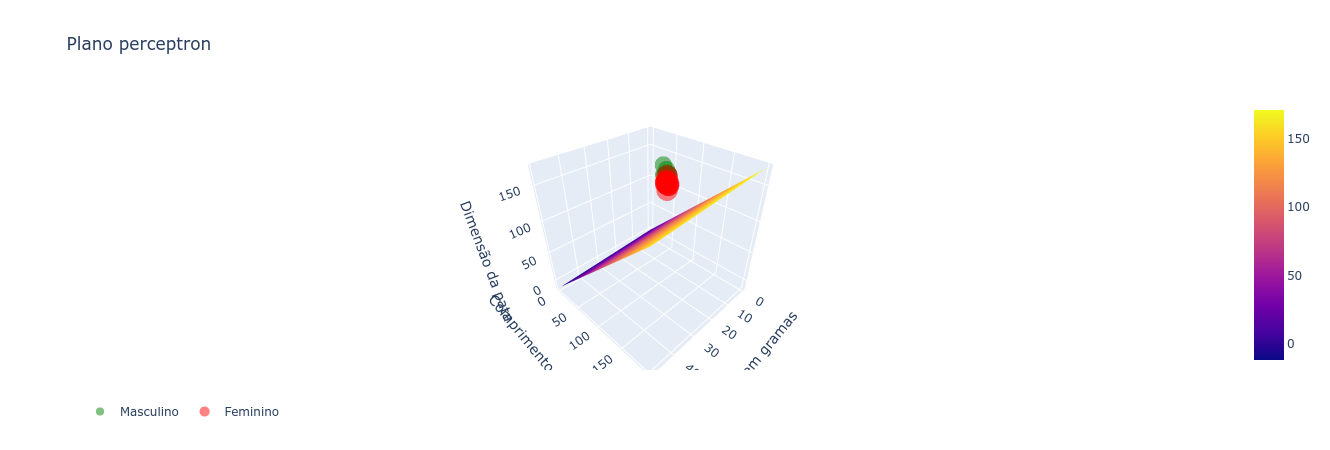

In [13]:
import plotly.graph_objects as go
import numpy as np

Femeas = Lagartos_data.loc[Lagartos_data.iloc[:,4] == 'F']
Machos = Lagartos_data.loc[Lagartos_data.iloc[:,4] == 'M']

# plot Femeas
Fx = Femeas.iloc[:,1]
Fy = Femeas.iloc[:,2]
Fz = Femeas.iloc[:,3]

fig = go.Figure()

# plot Machos
Mx = Machos.iloc[:,1]
My = Machos.iloc[:,2]
Mz = Machos.iloc[:,3]

# plot plano do Perceptron 
z = np.zeros((200,50))

for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        z[i,j] = (- i*p.weigths[0] - j * p.weigths[1]) / p.weigths[2]
        
fig = go.Figure(data=[
    go.Surface(z=-z),
    go.Scatter3d(
        x = Mx,
        y = My,
        z = Mz,
        mode='markers',
        marker=dict(
        size=8,
        color='green',
        opacity=0.5),
        name = "Masculino",
        
    ),
    go.Scatter3d(
        x = Fx,
        y = Fy,
        z = Fz,
        mode='markers',
        marker=dict(
        size=10,
        color='red',
        opacity=0.5),
        name = "Feminino")
])

fig.update_layout(scene = dict(
                    xaxis_title=Lagartos_data.columns[1],
                    yaxis_title='Comprimento do focinho',
                    zaxis_title='Dimensão da pata'),
                    width=700, 
                    title_text="Plano perceptron",
                    legend_orientation="h")

fig.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Testando o `Perceptron` chamado `p`
Testando um individuo por vez 

In [9]:
press = None

while press != 'c':
    print('Testando o Perceptron `p`:')
    massa = input('Insira a massa em gramas: ')

    while True:
        
        try:
            massa = float(massa)
            break
        except ValueError:
            print( "Apenas números!!!")
            massa = input('Insira a massa em gramas: ')
            
    comp = input('Comprimento da passagem de ar do focinho em milímetros: ')

    while True:
        
        try:
            comp = float(comp)
            break
        except ValueError:
            print( "Apenas números!!!")
            comp = input('Comprimento da passagem de ar do focinho em milímetros: ')
            
    dim = input('Dimensão da pata posterior em milímetros: ')

    while True:
        
        try:
            dim = float(dim)
            break
        except ValueError:
            print( "Apenas números!!!")
            dim = input('Dimensão da pata posterior em milímetros: ')
            
    print('Testando exemplo...')
    
    # nomalizando os valores do usuário
    massa = massa/Lagartos_data.iloc[:19,:-1].max()[0]
    
    if (massa > 1):
        massa = 1
        
    comp = comp/Lagartos_data.iloc[:19,:-1].max()[1]
    
    if (comp > 1):
        comp = 1
        
    dim = dim/Lagartos_data.iloc[:19,:-1].max()[2]
    
    if (dim > 1):
        dim = 1
        
    individuo = np.array([1,massa,comp,dim])
    print(individuo)
    p.predict(individuo)
    press = input('Deseja continuar? se nao digite "c" ')

Testando o Perceptron `p`:


Insira a massa em gramas:  9
Comprimento da passagem de ar do focinho em milímetros:  9
Dimensão da pata posterior em milímetros:  9


Testando exemplo...
[1.         1.         0.58090751 0.10404624]
A classe do indivíduo é "F"; O valor predito foi:  -0.00491083030391294


Deseja continuar? se nao digite "c"  c


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Testando nos dados de teste

Manipulando e normalizando os dados de teste

In [10]:
Lagartos_normalizados_teste = Lagartos_data.iloc[19:,:-1] / Lagartos_data.iloc[:19,:-1].max()

Lagartos_normalizados_teste > 1 # vendo se algum deles passa do maximo anteriormente estabelecido

Bias  massa em gramas  \
19  False            False   
20  False            False   
21  False            False   
22  False            False   
23  False            False   
24  False            False   

    comprimento da passagem de ar do focinho em milímetros  \
19                                              False        
20                                              False        
21                                              False        
22                                              False        
23                                              False        
24                                              False        

    dimensão da pata posterior em milímetros  
19                                     False  
20                                     False  
21                                     False  
22                                     False  
23                                     False  
24                                     False

In [11]:
# como nenhum dado do teste passou do maximo anteriormente estabelecido vamos apenas olhar nosso dados de teste normalizados
Lagartos_normalizados_teste

Bias  massa em gramas  \
19   1.0         0.648616   
20   1.0         0.332344   
21   1.0         0.591106   
22   1.0         0.783063   
23   1.0         0.450397   
24   1.0         0.444717   

    comprimento da passagem de ar do focinho em milímetros  \
19                                           0.855491        
20                                           0.687861        
21                                           0.786127        
22                                           0.867052        
23                                           0.768786        
24                                           0.728324        

    dimensão da pata posterior em milímetros  
19                                  0.845679  
20                                  0.716049  
21                                  0.759259  
22                                  0.870370  
23                                  0.722222  
24                                  0.722222

In [12]:
for individuo in Lagartos_normalizados_teste.values:
    p.predict(individuo)

A classe do indivíduo é "M"; O valor predito foi:  0.0019582616381650167
A classe do indivíduo é "F"; O valor predito foi:  -0.004650141852927437
A classe do indivíduo é "F"; O valor predito foi:  -0.00022540888491757657
A classe do indivíduo é "M"; O valor predito foi:  0.004467147093350008
A classe do indivíduo é "F"; O valor predito foi:  -0.003033270764386139
A classe do indivíduo é "F"; O valor predito foi:  -0.002949216225190846



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)